# Generate Modified DFs from Originals on Calisto

In [64]:
import pandas as pd
import numpy as np
from pathlib import Path
import pickle as pkl

In [65]:
CELLMAPS = "~/.venv/lib/python3.8/site-packages"
DATA_FOLDER = "/data/ishang/music/"
INPUT_FOLDER = "./examples/"
feature_path = Path("/data/ishang/music/cell_features_test_default_cell_v1.npz")
cell_id_path = Path("/data/ishang/music/test.csv")
labels = Path("/data/ishang/music/cells_publicHPA.csv")
hpa_images_path = Path("/data/ishang/music/IF-image.csv")
# hpa_images_path = Path("/data/ishang/music/cells_publicHPA_v23.csv")

In [66]:
labels = pd.read_csv(labels)
labels.head()

,ID,Label,maskid,cellmask,ImageWidth,ImageHeight,Nucleoplasm,NuclearM,Nucleoli,NucleoliFC,...,Microtubules,MitoticS,Centrosome,PlasmaM,Mitochondria,Aggresome,Cytosol,VesiclesPCP,Negative,target
0,169_E5_1,0,1,eNqFlnmXojgQwL9SCmy638zO7hw7b0abVAKCCIiACipXvv...,1728,1728,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nucleoplasm
1,169_E5_1,0,2,eNq9VvtzokgQ/pemBZOwW7tVl7vCjWCPiDx8wCCgOEjg//...,1728,1728,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nucleoplasm
2,169_E5_1,0,3,eNrFk1FPwyAQx7/S/anRxMTMV816NHuwTOpgs8tWF/3+j0...,1728,1728,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nucleoplasm
3,169_E5_1,0,4,eNp1UWlPwzAM/UtxmmnhEAjQ1FY09oDu7jZp2aGVAf//G3...,1728,1728,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nucleoplasm
4,169_E5_1,0,5,eNp1VNmS2kAM/CVrjE2lKm+pSsLYnuEmu8By2MvWcvn/36...,1728,1728,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nucleoplasm


In [60]:
hpa_images = pd.read_csv(hpa_images_path)
print(hpa_images.columns)
hpa_images.head()

/tmp/ipykernel_1235049/1309227903.py:1: DtypeWarning: Columns (7,8,14,16,18,19,33) have mixed types. Specify dtype option on import or set low_memory=False.
  hpa_images = pd.read_csv(hpa_images_path)


Index(['filename', 'jpg_prefix', 'if_plate_id', 'position', 'sample', 'status',
       'Image status name', 'locations', 'staining characteristics',
       'unspecific', 'antibody', 'ensembl_ids', 'gene_names', 'atlas_name',
       'versions', 'earliest_version', 'first_released', 'latest_version',
       'Spatial cell cycle', 'Intensity cell cycle', 'Annotated cell cycle',
       'gain', 'x_pos', 'y_pos', 'z_pos', 'Experiment state', 'Ab state',
       'Max tpm', 'Finished in genes', 'Protocol',
       'Gene reliability (in release)', 'Gene reliability (lims)',
       'Cell count', 'well_location_predictions_all'],
      dtype='object')


,filename,jpg_prefix,if_plate_id,position,sample,status,Image status name,locations,staining characteristics,unspecific,...,z_pos,Experiment state,Ab state,Max tpm,Finished in genes,Protocol,Gene reliability (in release),Gene reliability (lims),Cell count,well_location_predictions_all
0,/archive/1/1_A1_1_,https://lims.proteinatlas.org/images/992/1_A1_1_,1,A1,1,35,Annotated / Proteinatlas,Golgi apparatus,NaN,0.0,...,NaN,IF_FINISHED,IF_FINISHED,16.13,ENSG00000066455,PFA,Supported,Supported,7.0,NaN
1,/archive/1/1_A1_2_,https://lims.proteinatlas.org/images/992/1_A1_2_,1,A1,2,35,Annotated / Proteinatlas,Golgi apparatus,NaN,0.0,...,NaN,IF_FINISHED,IF_FINISHED,16.13,ENSG00000066455,PFA,Supported,Supported,6.0,NaN
2,/archive/1/1_A10_1_,https://lims.proteinatlas.org/images/1202/1_A1...,1,A10,1,35,Annotated / Proteinatlas,Cytosol,NaN,0.0,...,NaN,IF_FINISHED,IF_FAILED,30.50,NaN,PFA,NaN,NaN,5.0,NaN
3,/archive/1/1_A10_2_,https://lims.proteinatlas.org/images/1202/1_A1...,1,A10,2,35,Annotated / Proteinatlas,Cytosol,NaN,0.0,...,NaN,IF_FINISHED,IF_FAILED,30.50,NaN,PFA,NaN,NaN,4.0,NaN
4,/archive/1/1_A11_1_,https://lims.proteinatlas.org/images/4907/1_A1...,1,A11,1,35,Annotated / Proteinatlas,NaN,NaN,1.0,...,NaN,IF_FAILED_REVIEW,IF_FAILED,0.07,NaN,PFA,NaN,NaN,3.0,NaN


In [69]:
labels["cell_idx"] = labels["ID"].astype(str) + "_" + labels["maskid"].astype(str)
# labels["cell_idx"] = [f"{r.ID}_{r.maskid}" for i, r in labels.iterrows()]

# columns = list(labels.columns)
# columns.pop(columns.index("cell_idx"))
# columns.insert(0, "cell_idx")

# for c in columns:
#     if c in ["cell_idx", "Label", "maskid", "cellmask", "ID"]:
#         continue
#     print(c)
#     print(labels[c].unique())

# for i, r in labels.iterrows():
#     if r.hasnans:
#         print(r)

# labels_df = labels[columns].dropna()
labels_df = labels.dropna()
labels_df.head()

,ID,Label,maskid,cellmask,ImageWidth,ImageHeight,Nucleoplasm,NuclearM,Nucleoli,NucleoliFC,...,MitoticS,Centrosome,PlasmaM,Mitochondria,Aggresome,Cytosol,VesiclesPCP,Negative,target,cell_idx
0,169_E5_1,0,1,eNqFlnmXojgQwL9SCmy638zO7hw7b0abVAKCCIiACipXvv...,1728,1728,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nucleoplasm,169_E5_1_1
1,169_E5_1,0,2,eNq9VvtzokgQ/pemBZOwW7tVl7vCjWCPiDx8wCCgOEjg//...,1728,1728,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nucleoplasm,169_E5_1_2
2,169_E5_1,0,3,eNrFk1FPwyAQx7/S/anRxMTMV816NHuwTOpgs8tWF/3+j0...,1728,1728,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nucleoplasm,169_E5_1_3
3,169_E5_1,0,4,eNp1UWlPwzAM/UtxmmnhEAjQ1FY09oDu7jZp2aGVAf//G3...,1728,1728,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nucleoplasm,169_E5_1_4
4,169_E5_1,0,5,eNp1VNmS2kAM/CVrjE2lKm+pSsLYnuEmu8By2MvWcvn/36...,1728,1728,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nucleoplasm,169_E5_1_5


In [70]:
print(hpa_images["Experiment state"].unique())
print(hpa_images["Ab state"].unique())
print(hpa_images["Gene reliability (in release)"].unique())
print(hpa_images["Gene reliability (lims)"].unique())

['IF_FINISHED']
['IF_FINISHED']
['Supported' 'Enhanced']
['Supported' 'Enhanced' 'Approved' 'Uncertain']


In [71]:
hpa_images["ID"] = [f.split("/")[-1][:-1] for f in hpa_images["filename"]]
hpa_images = hpa_images[hpa_images["Experiment state"] == "IF_FINISHED"]
hpa_images = hpa_images[hpa_images["Ab state"] == "IF_FINISHED"]
hpa_images = hpa_images[hpa_images["Gene reliability (in release)"].isin(["Enhanced", "Supported"])]

columns = ["ID", "filename", "if_plate_id", "position", "sample", "locations", "antibody", "ensembl_ids", "gene_names",
           "Spatial cell cycle", "Intensity cell cycle", "Annotated cell cycle", "Ab state",
           "Gene reliability (in release)", "Gene reliability (lims)", "Cell count", "well_location_predictions_all"]
hpa_images_df = hpa_images[hpa_images["atlas_name"] == "U2OS"][columns]
 
unique_ids = ["filename", "ID", "if_plate_id", "position", "sample", "antibody", "ensembl_ids", "gene_names"] 
other = ["locations", "Spatial cell cycle", "Intensity cell cycle", "Annotated cell cycle", "well_location_predictions_all"]
rest = [c for c in columns if (c not in unique_ids) and (c not in other)]
# for c in columns:
#     if c not in rest:
#         continue
#     print(c)
#     print(hpa_images[c].unique())

# drop all rows with nans for the columns in rest
hpa_images_df = hpa_images_df.dropna(subset=rest)
hpa_images_df.head()

,ID,filename,if_plate_id,position,sample,locations,antibody,ensembl_ids,gene_names,Spatial cell cycle,Intensity cell cycle,Annotated cell cycle,Ab state,Gene reliability (in release),Gene reliability (lims),Cell count,well_location_predictions_all
0,1_A1_1,/archive/1/1_A1_1_,1,A1,1,Golgi apparatus,HPA000992,ENSG00000066455,GOLGA5,NaN,NaN,0.0,IF_FINISHED,Supported,Supported,7.0,NaN
1,1_A1_2,/archive/1/1_A1_2_,1,A1,2,Golgi apparatus,HPA000992,ENSG00000066455,GOLGA5,NaN,NaN,0.0,IF_FINISHED,Supported,Supported,6.0,NaN
16,1_A6_1,/archive/1/1_A6_1_,1,A6,1,"Endoplasmic reticulum,Nuclear membrane",HPA000609,ENSG00000102119,EMD,NaN,NaN,0.0,IF_FINISHED,Enhanced,Enhanced,5.0,NaN
17,1_A6_2,/archive/1/1_A6_2_,1,A6,2,"Endoplasmic reticulum,Nuclear membrane",HPA000609,ENSG00000102119,EMD,NaN,NaN,0.0,IF_FINISHED,Enhanced,Enhanced,7.0,NaN
20,1_A8_1,/archive/1/1_A8_1_,1,A8,1,Mitochondria,HPA000898,ENSG00000113013,HSPA9,NaN,NaN,0.0,IF_FINISHED,Supported,Supported,4.0,NaN


In [73]:
sc_image_features = np.load(feature_path)['feats']
sc_image_features = sc_image_features / np.linalg.norm(sc_image_features, axis=1)[:, None]

In [74]:
cell_id_df = pd.read_csv(cell_id_path)
cell_id_df["cell_idx"] = cell_id_df["ID"].astype(str) + "_" + cell_id_df["maskid"].astype(str)
# cell_id_df["cell_idx"] = [f"{r.ID}_{r.maskid}" for i, r in cell_id_df.iterrows()]
cell_id_df.head()

,ID,ImageHeight,ImageWidth,maskid,cellmask,cell_idx
0,1657_F11_3,2048,2048,1,eNqlkMEKwjAMQH9pTarDo7eJadbhVgSZXoa4reL/32wo9S...,1657_F11_3_1
1,1657_F11_3,2048,2048,2,eNp9lOlu2zoQhV9JQzlpcIO2QYsEt4k59CbL2ijKlmTL6/...,1657_F11_3_2
2,1657_F11_3,2048,2048,3,eNqVleuSozYQhV+Jg12TyrUqqSRVmQyNwVcuAnERtjGG9/...,1657_F11_3_3
3,1657_F11_3,2048,2048,4,eNqlUtsOgjAM/aV1gBJMjA9qIowWLw8makK8JD6g/P+bG3...,1657_F11_3_4
4,1657_F11_3,2048,2048,5,eNqFVNGSqjgQ/aWc4O4U1D7sw0rtXCeNCCMiCQGCCir4/2...,1657_F11_3_5


In [75]:
# save cell_id_df, labels_df, hpa_images_df, sc_image_features
cell_id_df.to_csv(DATA_FOLDER + "cell_id_df.csv")
labels_df.to_csv(DATA_FOLDER + "labels_df.csv")
hpa_images_df.to_csv(DATA_FOLDER + "hpa_images_df.csv")
np.save(DATA_FOLDER + "sc_image_features.npy", sc_image_features)

# Checking which list of genes to use

In [82]:
print(len(cell_id_df["ID"].unique()), len(hpa_images_df["ID"].unique()))
sc_images = set(cell_id_df["ID"].unique())
hpa_images = set(hpa_images_df["ID"].unique())
print(len(sc_images.intersection(hpa_images)))
sc_genes = set(hpa_images_df[hpa_images_df["ID"].isin(sc_images)]["gene_names"].unique())
sc_genes = set([g.lower() for g in sc_genes])
print(len(sc_genes))

87321 30508
13733
5056


In [83]:
u2os_hpa = pd.read_csv("/home/ishang/cellmaps_toolkit/U20S_ref/unique.csv")
print(u2os_hpa.columns)
u2os_hpa_genes = set(u2os_hpa["gene_names"].unique())
u2os_hpa_genes = set([g.lower() for g in u2os_hpa_genes])
print(len(u2os_hpa_genes))
print(len(u2os_hpa_genes.intersection(sc_genes)))

Index(['antibody', 'ensembl_ids', 'gene_names', 'atlas_name', 'locations',
       'n_location'],
      dtype='object')
10279
4581


In [84]:
u2os_bioplex = pd.read_csv("/home/ishang/cellmaps_toolkit/U20S_ref/EH BioPlex U2OS Network.tsv", sep="\t")
print(u2os_bioplex.columns)
u2os_bioplex_genes = set(u2os_bioplex["Symbol1"].unique()) | set(u2os_bioplex["Symbol2"].unique())
u2os_bioplex_genes = set([g.lower() for g in u2os_bioplex_genes])
print(len(u2os_bioplex_genes))
print(len(u2os_bioplex_genes.intersection(sc_genes)))

Index(['GeneID1', 'Symbol1', 'GeneID2', 'Symbol2'], dtype='object')
7584
2893


In [85]:
print(len(u2os_bioplex_genes.intersection(u2os_hpa_genes)))
music_genes = u2os_bioplex_genes.intersection(u2os_hpa_genes)

5022


In [86]:
print(len(music_genes.intersection(u2os_bioplex_genes.intersection(sc_genes))))

2720


In [87]:
print(len(sc_genes.union(u2os_hpa_genes).union(u2os_bioplex_genes)))

13143


In [80]:
pkl.dump(music_genes, open(DATA_FOLDER + "music_genes.pkl", "wb"))

# Embedding Testing

In [29]:
import pandas as pd
import numpy as np
from pathlib import Path
import pickle as pkl
from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
u2os_embeddings = np.load("u2os_embeddings.npy")
u2os_labels = pd.read_csv("u2os_labels.csv")
print(len(u2os_embeddings), len(u2os_labels))

/tmp/ipykernel_3693548/2910099473.py:2: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  u2os_labels = pd.read_csv("u2os_labels.csv")


418608 418608


In [5]:
u2os_embeddings_norm = u2os_embeddings / np.linalg.norm(u2os_embeddings, axis=1)[:, None]

In [6]:
loc_labels = u2os_labels["target"].values
true_labels = u2os_labels["gene_names"].values

/home/ishang/miniconda3/envs/implicit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ishang/miniconda3/envs/implicit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ishang/miniconda3/envs/implicit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ishang/miniconda3/envs/implicit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

<Axes: xlabel='embedding_norms', ylabel='Count'>

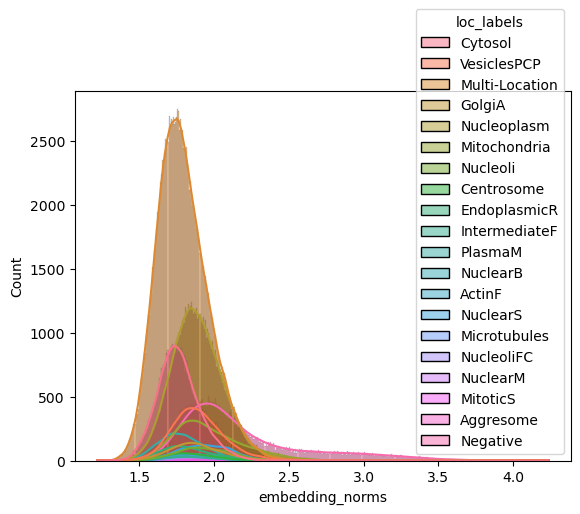

In [36]:
embedding_norms = np.log(np.linalg.norm(u2os_embeddings, axis=1))
df = pd.DataFrame({"embedding_norms": embedding_norms, "loc_labels": loc_labels, "true_labels": true_labels})
sns.histplot(data=df, x="embedding_norms", hue="loc_labels", kde=True)

In [15]:
# plot a UMAP of the embeddings, colored by the true label


sample_size = 10000
embeddings = u2os_embeddings

sample_indices = np.random.choice(len(embeddings), sample_size, replace=False)
# umap = UMAP(n_components=3, metric="cosine")
umap = UMAP(n_components=3)
umap_embeddings = umap.fit_transform(embeddings[sample_indices])

In [18]:
single_localizing = [loc != "Multi-Location" for loc in loc_labels]
nuclear_labels = ["Nucleoplasm", "Centrosome", "Nucleoli", "NuclearM", "NuclearS", "NuclearB", "NucleoliFC", "MitoticS"]
negative_labels = ["Negative"]
cytoplasmic_labels = set(loc_labels) - set(nuclear_labels) - set(negative_labels)
sparse_labels = np.array(["nuclear" if l in nuclear_labels else "cytoplasmic" if l in cytoplasmic_labels else "negative" for l in loc_labels])

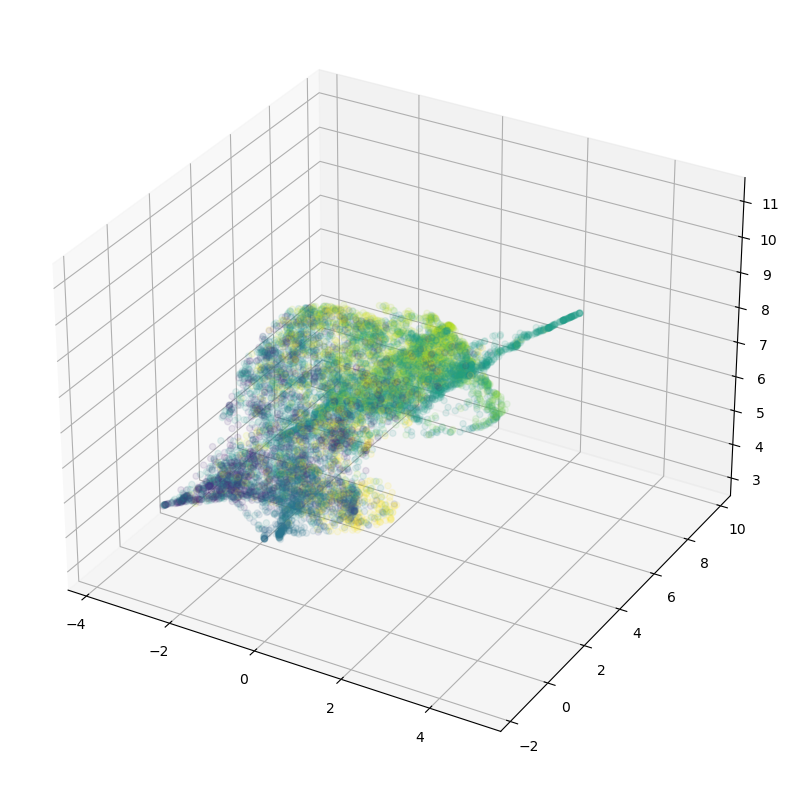

In [25]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
label_list = loc_labels
labels = list(sorted(set(label_list[sample_indices])))
labels_to_int = [labels.index(l) for l in label_list[sample_indices]]
ax.scatter3D(umap_embeddings[:, 0], umap_embeddings[:, 1], umap_embeddings[:, 2], c=labels_to_int, alpha=0.1)

/home/ishang/miniconda3/envs/implicit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ishang/miniconda3/envs/implicit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ishang/miniconda3/envs/implicit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ishang/miniconda3/envs/implicit/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

<Axes: >

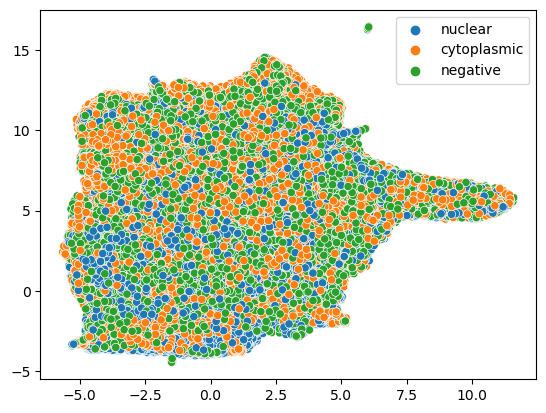

In [7]:
# color_labels = np.array([np.where(genes == l)[0] for l in true_labels]).flatten()
# sns.scatterplot(x=umap_embeddings[single_localizing, 0], y=umap_embeddings[single_localizing, 1], hue=true_labels[single_localizing], legend=False)
# plt.show()
# plt.clf()

sns.scatterplot(x=umap_embeddings[single_localizing, 0], y=umap_embeddings[single_localizing, 1], hue=sparse_labels[single_localizing], legend=True)

In [8]:
# PCA on the sc embeddings and plot the first two components with the location coloring
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)
scaler = StandardScaler()
pca_embeddings = pca.fit_transform(scaler.fit_transform(embeddings))
sns.scatterplot(x=pca_embeddings[single_localizing, 0], y=pca_embeddings[single_localizing, 1], hue=loc_labels[single_localizing], legend=True)
print(pca.explained_variance_ratio_)

NameError: name 'gene_embeddings' is not defined

In [ ]:
# run kmeans on the embeddings
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=n, random_state=0).fit(embeddings)

/home/ishang/miniconda3/envs/implicit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# for each label, get a list of true gene lables
print(len(kmeans.labels_), len(true_labels))
cluster_labels = {l: [] for l in np.unique(kmeans.labels_)}
for i, l in enumerate(kmeans.labels_):
    cluster_labels[l].append(true_labels[i])

# assign the majority gene to each cluster
cluster_genes = {l: max(set(cluster_labels[l]), key=cluster_labels[l].count) for l in cluster_labels}
print(cluster_genes)

# get the true positive/negative rate for each cluster
cluster_tpr = {l: 0 for l in cluster_labels}
cluster_tnr = {l: 0 for l in cluster_labels}
for i, l in enumerate(kmeans.labels_):
    if true_labels[i] == cluster_genes[l]:
        cluster_tpr[l] += 1
    else:
        cluster_tnr[l] += 1
for l in cluster_labels:
    cluster_tpr[l] /= len(cluster_labels[l])
    cluster_tnr[l] /= len(cluster_labels[l])
print(cluster_tpr)
print(cluster_tnr)

455 455
{0: 'PPP2R5E', 1: 'PROX1', 2: 'RAB5C', 3: 'PCIF1', 4: 'CHRNA3', 5: 'GTPBP3', 6: 'PROX1', 7: 'GTPBP3', 8: 'SELENOS', 9: 'PSMG1', 10: 'PSMG1', 11: 'GTPBP3', 12: 'TBC1D5', 13: 'CHRNA3', 14: 'GTPBP3', 15: 'PSMG1', 16: 'PSMG1', 17: 'PCIF1', 18: 'PROX1', 19: 'CHRNA3', 20: 'RELB', 21: 'PROX1', 22: 'PPP2R3B', 23: 'TBC1D5', 24: 'EPS8L2', 25: 'SELENOS', 26: 'GTPBP3', 27: 'PPP2R3B', 28: 'RBFOX3', 29: 'RBFOX3'}
{0: 0.3333333333333333, 1: 0.8333333333333334, 2: 0.3870967741935484, 3: 1.0, 4: 0.3333333333333333, 5: 0.6666666666666666, 6: 0.5384615384615384, 7: 0.55, 8: 0.625, 9: 0.6666666666666666, 10: 0.22580645161290322, 11: 0.7368421052631579, 12: 0.42857142857142855, 13: 0.6818181818181818, 14: 0.7142857142857143, 15: 0.8571428571428571, 16: 1.0, 17: 0.5714285714285714, 18: 0.375, 19: 0.5882352941176471, 20: 0.45454545454545453, 21: 0.3076923076923077, 22: 0.4642857142857143, 23: 1.0, 24: 0.5714285714285714, 25: 0.875, 26: 0.4, 27: 0.6666666666666666, 28: 0.6, 29: 0.20833333333333334}
{0

In [ ]:
kmeans = KMeans(n_clusters=len(set(loc_labels[single_localizing])), random_state=0).fit(gene_embeddings[single_localizing])
cluster_labels = {l: [] for l in np.unique(kmeans.labels_)}
filtered_loc_labels = loc_labels[single_localizing]
for i, l in enumerate(kmeans.labels_):
    cluster_labels[l].append(filtered_loc_labels[i])
cluster_locs = {l: max(set(cluster_labels[l]), key=cluster_labels[l].count) for l in cluster_labels}
print(cluster_locs)
cluster_tpr = {l: 0 for l in cluster_labels}
cluster_tnr = {l: 0 for l in cluster_labels}
for i, l in enumerate(kmeans.labels_):
    if filtered_loc_labels[i] == cluster_locs[l]:
        cluster_tpr[l] += 1
    else:
        cluster_tnr[l] += 1
for l in cluster_labels:
    cluster_tpr[l] /= len(cluster_labels[l])
    cluster_tnr[l] /= len(cluster_labels[l])
print(cluster_tpr)
print(cluster_tnr)

/home/ishang/miniconda3/envs/implicit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


{0: 'Cytosol', 1: 'VesiclesPCP', 2: 'Nucleoplasm', 3: 'VesiclesPCP', 4: 'Negative', 5: 'Mitochondria', 6: 'Nucleoplasm', 7: 'Mitochondria'}
{0: 0.37333333333333335, 1: 0.29333333333333333, 2: 0.27419354838709675, 3: 0.45714285714285713, 4: 0.425, 5: 0.48, 6: 0.7272727272727273, 7: 0.38571428571428573}
{0: 0.6266666666666667, 1: 0.7066666666666667, 2: 0.7258064516129032, 3: 0.5428571428571428, 4: 0.575, 5: 0.52, 6: 0.2727272727272727, 7: 0.6142857142857143}


# Is this useful as a location similarity metric?